In [27]:
#Importing important modules and libralies

import os
import tensorflow as tf
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools
from tensorflow.keras.preprocessing import image
import tensorflow_hub as hub

In [28]:
#Customising the modules

mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'


In [29]:
#Function for converting tensor to image 

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


In [30]:
#Function for visualizing and loading of an input image

def load_img(path_to_img):
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [31]:
#Function for displaying an image

def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

In [32]:
# #Loading the images

style_image = load_img("images/style.jpg")
content_image = load_img("images/content.jpg")


In [33]:
#Viewing the shape of the style image

style_image.shape

TensorShape([1, 600, 396, 3])

In [34]:
#Viewing the shape of the content image

content_image.shape

TensorShape([1, 1463, 2197, 3])

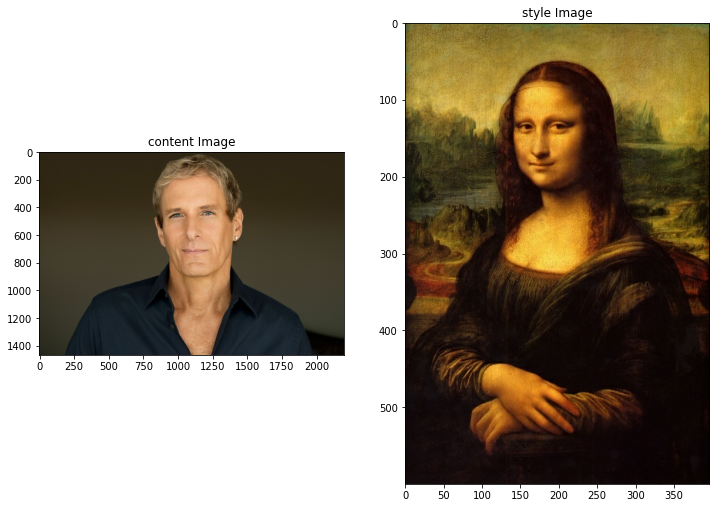

In [35]:
#Showing/Displaying the images

plt.subplot(1, 2, 1)
imshow(content_image, 'content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'style Image')



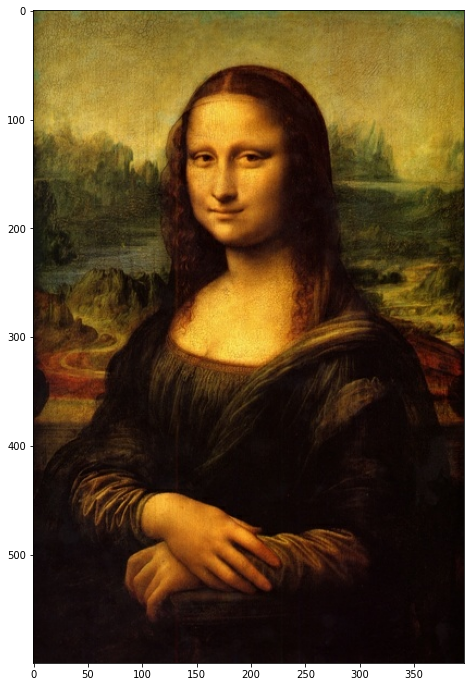

In [36]:
#Sqeezing the styling image before being used to style the content image

plt.imshow(np.squeeze(style_image))
plt.show()

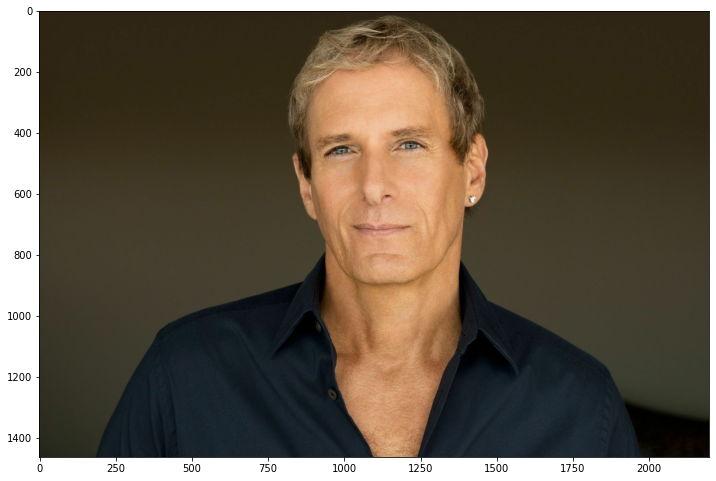

In [37]:
#Sqeezing the content image before being used to be styled

plt.imshow(np.squeeze(content_image))
plt.show()

In [ ]:
#Loading the Tensorflow hub model

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


In [38]:
#Resulted stylized image

stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

NameError: name 'hub_model' is not defined

In [ ]:
#Viewing the resulted stylized image

plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
#Converting the stylized tensor image to a normal image

normal_stylized_image = tensor_to_image(stylized_image)

In [ ]:
#save stylized image

file_name = 'stylized-image.png'
cv2.imwrite(file_name, cv2.cvtColor(np.squeeze(normal_stylized_image)*255, cv2.COLOR_BGR2RGB))

### NB:
### If TRUE is displayed it means the image has already been saved